<a href="https://colab.research.google.com/github/PabloAguirrer2041/Actividades/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del dataset:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246

Datos normalizados (primeras filas):
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0        0.371735          0.182609          0.262269
1           1        0.950755          0.540740          0.247509
2           2        0.730954          0.873049          0.908233
3           3        0.596960          0.731791          0.250082
4           4        0.152134          0.806411          0.272535


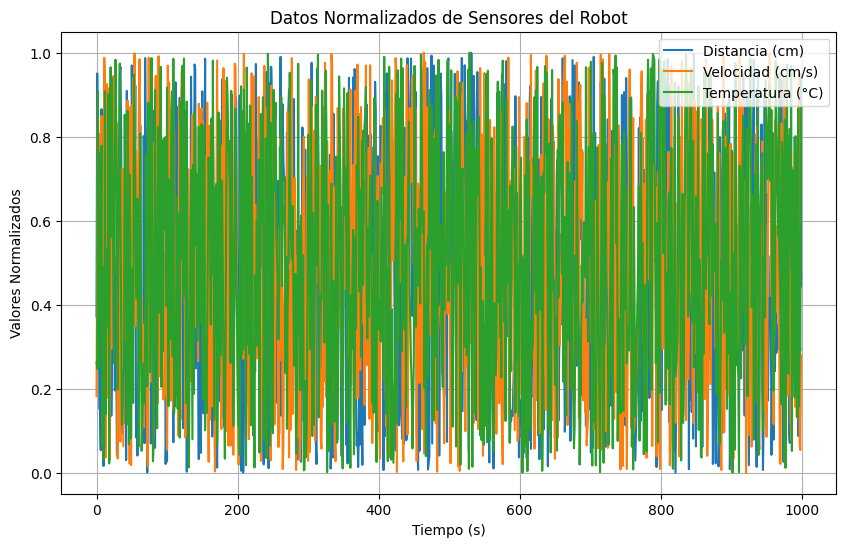

In [1]:
# Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil

# ======================
# 1. Importar librerías
# ======================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ======================
# 2. Cargar dataset
# ======================
url = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv"
df = pd.read_csv(url)

# ======================
# 3. Mostrar primeras filas
# ======================
print("Primeras filas del dataset:")
print(df.head())

# ======================
# 4. Limpieza de datos
# ======================

# Eliminar filas con valores nulos
df = df.dropna()

# Filtrar valores atípicos (ejemplo: velocidad negativa)
df = df[df["Velocidad (cm/s)"] >= 0]

# ======================
# 5. Normalización
# ======================
scaler = MinMaxScaler()

# Normalizar solo las columnas numéricas (excepto 'Tiempo (s)')
cols_to_normalize = ["Distancia (cm)", "Velocidad (cm/s)", "Temperatura (°C)"]

df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print("\nDatos normalizados (primeras filas):")
print(df_normalized.head())

# ======================
# 6. Visualización
# ======================

plt.figure(figsize=(10,6))
plt.plot(df_normalized["Tiempo (s)"], df_normalized["Distancia (cm)"], label="Distancia (cm)")
plt.plot(df_normalized["Tiempo (s)"], df_normalized["Velocidad (cm/s)"], label="Velocidad (cm/s)")
plt.plot(df_normalized["Tiempo (s)"], df_normalized["Temperatura (°C)"], label="Temperatura (°C)")

plt.title("Datos Normalizados de Sensores del Robot")
plt.xlabel("Tiempo (s)")
plt.ylabel("Valores Normalizados")
plt.legend()
plt.grid(True)
plt.show()
